In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## Question 1a.

In [3]:
def kmeans(X, centroids, max_iter=100):
  k = len(centroids)
  for i in range(max_iter):
    # Assign each data point to its nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Update centroids to be the mean of the points assigned to them
    for j in range(k):
        centroids[j] = np.mean(X[labels == j], axis=0)
  
  return labels, centroids

init_centroids = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]])
X = np.loadtxt('drive/MyDrive/CS6220/HW4/f150_motor_distributors.txt', delimiter=",")
labels, centroids = kmeans(X, init_centroids)

In [4]:
centroids

array([[ 26,  -1],
       [-30,   2],
       [  0,  -2],
       [ 11,  -1],
       [-12,   0]])

## Question 1b.

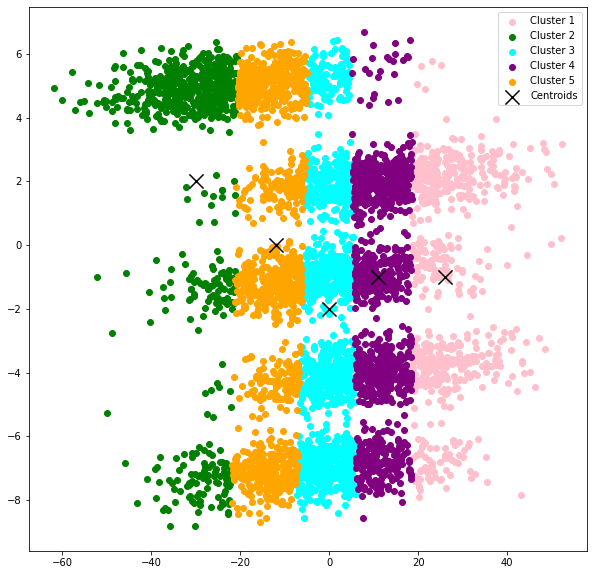

In [5]:
def plot_fig(X, labels, centroids):

  plt.figure(figsize=(10, 10))
  # Scatter data points with different colors for different clusters
  colors = ['pink', 'green', 'cyan', 'purple', 'orange']
  for i in range(5):
      plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
      
  # Scatter centroid positions in black
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')
  plt.legend()
  plt.show()
plot_fig(X, labels, centroids)

## Question 1c.

k=5 is a logical choice beacuase the data are in 5 different years. k allies with years. 

It doesn't cluster well. It cluster data vertically rather than horizontally by which seems to make sense. 

We can't make it cluster better by changing only initialization. It will always be dominated horizontally becasuse of the scale.

For example I give it a really nice initialization:

initall centroids: [[ 26  -1]
 [-30   2]
 [  0  -2]
 [ 11  -1]
 [-12   0]]


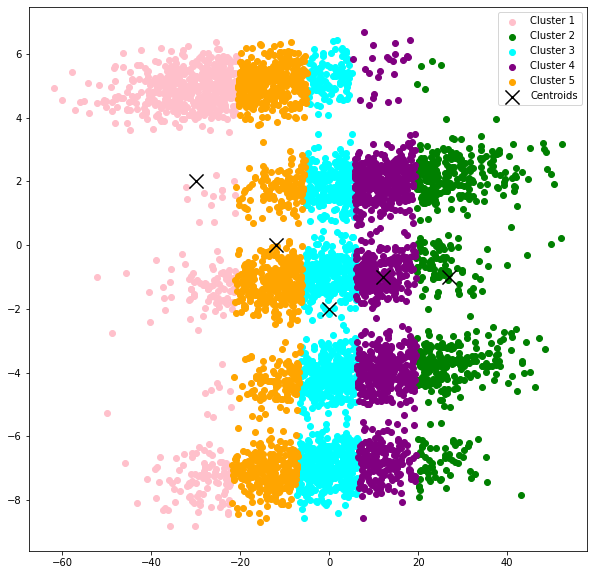

In [6]:
init_centroids = np.array([[-10,6],[0,2],[0,-2],[0,-4],[0,-8]])
print("initall centroids:", centroids)
labels, centroids = kmeans(X, init_centroids)
plot_fig(X, labels, centroids)

# Question 2

## Question 2a

In [7]:
P = np.array([[10,0.5],[-10,0.25]])
cov = P.T.dot(P)
inv_cov = np.linalg.inv(cov)
inv_cov



array([[ 0.00555556, -0.04444444],
       [-0.04444444,  3.55555556]])

In [8]:
from scipy.spatial.distance import cdist
def mahalanobis(x, mean, VI=inv_cov):
    """
    Computes the Mahalanobis distance between a point x and a distribution with
    mean 'mean' and covariance matrix 'cov'.
    """
    x_mean = x - mean
    return x_mean @ VI @ x_mean.T

def kmeans_mahalanobis(X, n_clusters, init, max_iter=100):
    """
    Performs k-means clustering with Mahalanobis distance on the dataset X.
    n_clusters: number of clusters to form
    init: array of shape (n_clusters, n_features) with the initial centroids
    max_iter: maximum number of iterations
    """
    # Initialize the centroids
    centroids = init.copy()

    for i in range(max_iter):
        # Assign each point to the closest centroid using Mahalanobis distance
        distances = cdist(X, centroids, 'mahalanobis', VI=inv_cov)
        labels = np.argmin(distances, axis=1)

        # Update the centroids as the mean of the points in each cluster
        for k in range(n_clusters):
            mask = (labels == k)
            if np.any(mask):
                centroids[k] = np.mean(X[mask], axis=0)

    return labels, centroids, distances

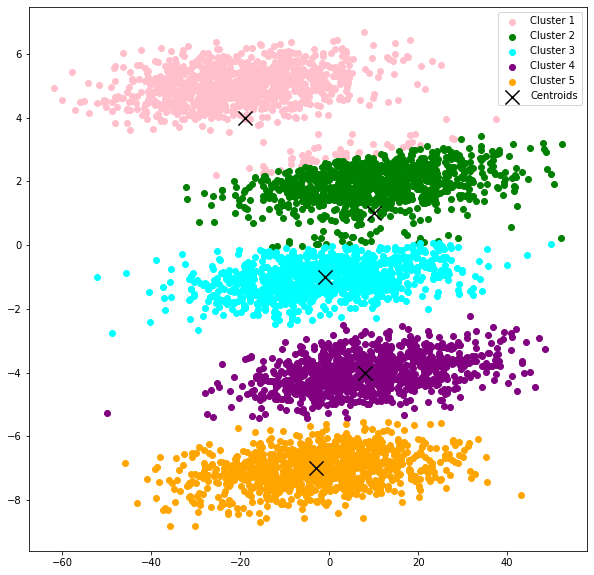

array([[-19,   4],
       [ 10,   1],
       [ -1,  -1],
       [  8,  -4],
       [ -3,  -7]])

In [9]:
# Set the number of clusters and the initial centroids
n_clusters = 5
init = np.array([[-20, 9], [10, 4], [0, -4], [8, -7], [-3, -10]])

# Perform k-means clustering with Mahalanobis distance
labels, centroids, distances = kmeans_mahalanobis(X, n_clusters, init, max_iter=100)

# Plot the results
plot_fig(X, labels, centroids)
centroids

It clustered much better than K-Means. The boarder of 5 cluster is clear. The boarder for Green Cluster is not too well, but everything else is great.

## Question 2b

In [10]:
# Center the data
X_centered = X - np.mean(X, axis=0)

# Compute the SVD of the centered data matrix
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Extract the principal components (the columns of V)
components = Vt.T

# Print the principal components
print(components)

[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


## Question 2c.

In [11]:
centers = centroids
k = 5
# Compute the principal components for each cluster
for i in range(k):
    # Extract the points in the current cluster
    cluster_points = X[labels == i]

    # Center the points around the current cluster center
    cluster_centered = cluster_points - centers[i]

    # Compute the SVD of the centered points
    U, s, Vt = np.linalg.svd(cluster_centered, full_matrices=False)

    # Extract the principal components (the columns of V)
    components = Vt.T

    # Print the principal components for the current cluster
    print(f"Cluster {i} components:")
    print(components)

Cluster 0 components:
[[-9.99999694e-01 -7.81855372e-04]
 [ 7.81855372e-04 -9.99999694e-01]]
Cluster 1 components:
[[-0.99988334  0.01527426]
 [-0.01527426 -0.99988334]]
Cluster 2 components:
[[ 0.99992723 -0.01206415]
 [ 0.01206415  0.99992723]]
Cluster 3 components:
[[ 0.9998954  -0.01446306]
 [ 0.01446306  0.9998954 ]]
Cluster 4 components:
[[ 0.99992511  0.01223806]
 [ 0.01223806 -0.99992511]]


They are different from the aggregate data. They are slightly different from each other which means the clusters are well-separated and exhibit distinct patterns.

## Question 2d.

In [24]:
w,v = np.linalg.eig(P.T @ P)
A = np.zeros((2,2))
A[0,0] = w[0]
A[1,1] = w[1]
P2 = A.dot(v)

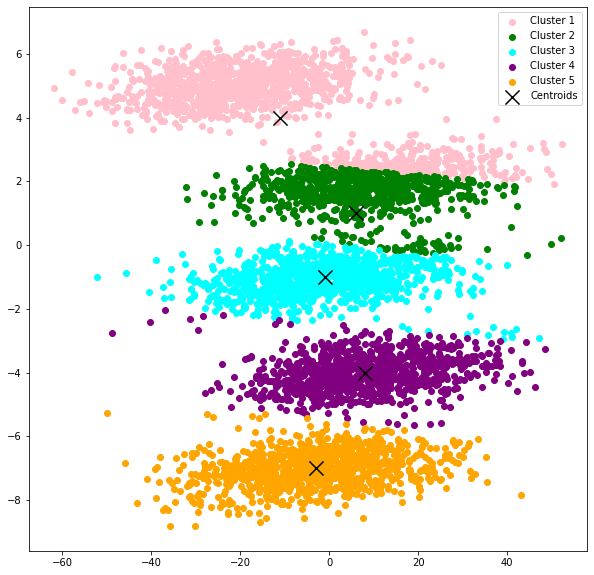

array([[-11,   4],
       [  6,   1],
       [ -1,  -1],
       [  8,  -4],
       [ -3,  -7]])

In [23]:
cov = P2.T.dot(P2)
inv_cov = np.linalg.inv(cov)
inv_cov

# Set the number of clusters and the initial centroids
n_clusters = 5
init = np.array([[-20, 9], [10, 4], [0, -4], [8, -7], [-3, -10]])

# Perform k-means clustering with Mahalanobis distance
labels, centroids, distances = kmeans_mahalanobis(X, n_clusters, init, max_iter=100)

# Plot the results
plot_fig(X, labels, centroids)
centroids

P2 is sitll a good projection matrix that separates out the data.